# **Text Generation**

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")
print(corpus)
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [ ]:
tokenizer.texts_to_sequences(["In the town of Athy one Jeremy Lanigan"])

[[4, 2, 66, 8, 67, 68, 69, 70]]

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
print(input_sequences)
print()
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print('input_sequences:',input_sequences)
print(input_sequences.shape)
print()
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
print('xs:',xs)
print()
print('labels:',labels)
print()
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)
print('ys:',ys)

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 88, 13, 2], [85, 86, 87, 33, 44, 88, 13, 2, 45], [1, 89], [1, 89,

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [ ]:
print(input_sequences[6])

[ 0  0  0  4  2 66  8 67 68 69 70]


In [ ]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(input_sequences[5])
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68 69]
[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  history = model.fit(xs, ys, epochs=500, verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16832     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
15/15 [==============================] - 4s 10ms/step - loss: 5.5712 - accuracy: 0.0076
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5537 - accuracy: 0.0377
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.5176 - accuracy: 0.0320
Epoch 4/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4010 - ac

In [ ]:
model.layers[0].get_weights()[0].shape

(263, 64)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

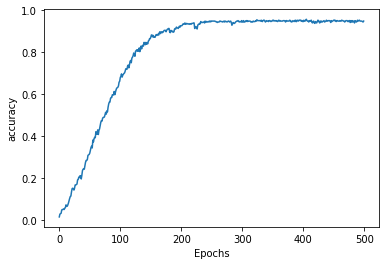

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
 
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin round as room as a rose rose rose mchugh farm at brooks mcgilligan further put ball ball at ball to at ball ball ball fainted ball for an young to give her a call terrance mccarthy mccarthy call mchugh farm for to at lanigans ball ball ball ball ball ball academy tea youd hall mchugh mchugh further spent for to at ball ball mad ball at lanigans ball ball ball for academy academy further academy further academy put lanigans ball ball at ball ball to ball ball ball to for at lanigans ball ball ball ball ball ball academy tea


In [ ]:
seed_text = "Laurence went to dublin"
token_list=tokenizer.texts_to_sequences([seed_text])[0]
token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
print(token_list)
print(model.predict(token_list))
predicted=model.predict_classes(token_list)
print(predicted)



[[  0   0   0   0   0   0   0 134  13  59]]
[[6.03144883e-07 2.14815154e-04 3.20775551e-03 7.25020480e-04
  4.99262998e-04 1.49084517e-05 3.06060028e-05 9.35542048e-05
  1.06883172e-05 8.50622109e-06 1.56182398e-06 5.25635784e-04
  1.39006069e-02 1.32157304e-03 1.29109176e-05 2.71915360e-06
  2.15576943e-02 8.98993603e-05 3.51558290e-02 9.93036628e-02
  4.11019893e-03 1.68638318e-04 5.38192467e-07 4.56787040e-03
  1.94422387e-06 6.32600069e-01 1.52077887e-03 5.66845920e-05
  8.83752818e-07 6.73044124e-05 2.26196065e-03 4.03189406e-05
  2.06620185e-04 1.73415744e-03 1.16069111e-06 8.56067686e-07
  7.13875750e-07 1.33687339e-03 2.15182245e-05 5.29780146e-03
  3.99544486e-04 1.10070605e-05 1.03480420e-06 7.86791759e-07
  8.92867800e-04 1.98798407e-05 7.62163040e-07 1.05383015e-06
  4.63064207e-05 1.04983337e-05 7.08818436e-03 4.69067163e-05
  2.27223154e-05 1.73018691e-06 2.89397337e-03 1.08630545e-07
  9.86582309e-05 2.42536535e-05 4.36714072e-05 4.45416646e-07
  2.46187319e-05 3.0844782

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
output_word = ""
for word, index in tokenizer.word_index.items():
		if index == predicted:
			 output_word = word
      #  print('index:', index)
      #  print('predicted:',predicted)
			 break
seed_text += " " + output_word
print(seed_text)

Laurence went to dublin round


In [ ]:
print(index)

25


In [ ]:
print(predicted)

[25]


In [ ]:
index==predicted

array([ True])

In [ ]:
1==np.array(1)

True

# **Irish-lyrics**

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-04-06 05:23:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-04-06 05:23:59 (88.3 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [11]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
print('type of data: ',type(data))
print(data)
print('--------------------------------------------------------------------------------------------------------------------------------------')
corpus = data.lower().split("\n")
print(corpus)
print()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1



type of data:  <class 'str'>
Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My tr

In [12]:
print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [14]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [15]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [16]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [17]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [18]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [19]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=10, verbose=1)
#print model.summary()
print(model)


Epoch 1/10
377/377 [==============================] - 28s 65ms/step - loss: 6.8902 - accuracy: 0.0576
Epoch 2/10
377/377 [==============================] - 24s 64ms/step - loss: 5.7905 - accuracy: 0.1049
Epoch 3/10
377/377 [==============================] - 24s 64ms/step - loss: 4.8964 - accuracy: 0.1557
Epoch 4/10
377/377 [==============================] - 24s 64ms/step - loss: 3.8538 - accuracy: 0.2520
Epoch 5/10
377/377 [==============================] - 24s 65ms/step - loss: 2.9515 - accuracy: 0.3793
Epoch 6/10
377/377 [==============================] - 24s 64ms/step - loss: 2.3324 - accuracy: 0.4739
Epoch 7/10
377/377 [==============================] - 24s 64ms/step - loss: 1.8115 - accuracy: 0.5761
Epoch 8/10
377/377 [==============================] - 24s 64ms/step - loss: 1.4182 - accuracy: 0.6654
Epoch 9/10
377/377 [==============================] - 24s 63ms/step - loss: 1.2174 - accuracy: 0.7064
Epoch 10/10
377/377 [==============================] - 24s 64ms/step - loss: 1.098

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

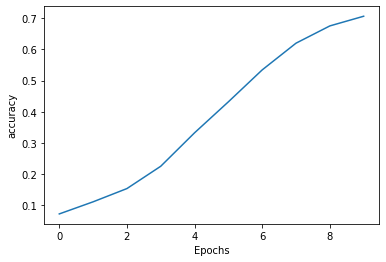

In [23]:
plot_graphs(history, 'accuracy')


In [25]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print()  
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



I've got a bad feeling about this proud old woman did say hes my hair it love love love love love love love love and sweeter be love love be your heart more bravely fell in fray odd again love love love love love love love and love again kathleen dear old was standing there inside kissed me its only hair in those town love love love love among me love im love be love so molly malone love again tune before somewhere lose love you love me love and i love the best games love and hes oer the sea may love again return again return


# **Text generation with an RNN**

https://www.tensorflow.org/tutorials/text/text_generation